In [131]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

from utils import generate_train_set, get_squared_error, get_x
from least_squares import normal_equation, stochastic_gradient_descent
import tqdm

# Общие настройки
Задаем размеры обучающей выборки, кол-во фичей

In [132]:
sample_size = 200  # размер выборки
num_of_features = 4 # кол-во признаков - кол-во столбцов в матр. x и размер вектора w

w = np.array([0.1, 0.2, 0.3, 0.4]) # это будет истинным значением памяти модели y = x * w
                                   # x - array of shape (sample_size, num_of_features)
                                   # w - array of shape (num_of_features, 1)

# Без шума
находим веса w для линейной модели y = x * w

In [133]:
sigma = 0 # дисперсия ошибки(она накладывается на y)

In [134]:
np.random.seed(1)
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  
y = y.flatten()

y_with_no_error = -3.865311186867432; error = [-0.]
y_with_no_error = -3.822777808848075; error = [0.]
y_with_no_error = 1.8309200199102957; error = [-0.]
y_with_no_error = -2.514611290738307; error = [-0.]
y_with_no_error = 2.893661434538633; error = [0.]
y_with_no_error = -6.277637771599348; error = [0.]
y_with_no_error = 1.893783628373457; error = [0.]
y_with_no_error = -1.4689047771237682; error = [0.]
y_with_no_error = 2.967283375330687; error = [-0.]
y_with_no_error = -1.4059433363429406; error = [-0.]
y_with_no_error = -3.851781981521678; error = [-0.]
y_with_no_error = -2.0019887431366525; error = [0.]
y_with_no_error = -0.6592720884843831; error = [-0.]
y_with_no_error = 4.373064112986536; error = [0.]
y_with_no_error = -0.3485089596585411; error = [-0.]
y_with_no_error = 2.133834699380285; error = [0.]
y_with_no_error = 1.5581423506208185; error = [-0.]
y_with_no_error = 4.600709461315211; error = [0.]
y_with_no_error = 1.3540386967117326; error = [-0.]
y_with_no_error = -2.4

In [135]:
x.shape

(200, 4)

In [136]:
y.shape

(200,)

# Решение

In [137]:
stoch_grad_desc_weights, stoch_errors_by_iter, weights_history = stochastic_gradient_descent(x, y, w_init = np.zeros(x.shape[1]), eta=0.1, max_iter=1000, min_weight_dist=1e-8, seed=42)

100%|██████████| 1000/1000 [00:00<00:00, 39655.70it/s]


## Графики изменения квадратичной ошибки весов и сходимости компонентов вектора весов

In [140]:
def plot_error_and_convergence(errors, weights):
    fig = plt.figure(figsize=(20,20))

    ax1 = fig.add_subplot(211)
    ax1.plot(errors);
    plt.xlabel('Номер итерации алгоритма МНК')
    plt.ylabel('Квадратичная ошибка')
    plt.title('Квадратичная ошибка: (w - w_estimation)^T * (w - w_estimation)')

    ax2 = fig.add_subplot(212)
    ax2.plot(weights.T)
    plt.title('Как сходятся компоненты вектора w_estimation к w')
    plt.xlabel('Номер итерации')
    plt.ylabel('Численное значение компоненты вектора весов w')

def plot_true_weights(weights, true_weights):
    # Указываем истинные веса на графике: компоненты вектора w 
    for index, w_component in enumerate(np.asarray(true_weights).reshape((-1))):
        plt.axhline(w_component, color='r', linestyle='--', label='{}: {}-ая компонента вектора w'.format(
            w_component, index), alpha=0.5)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

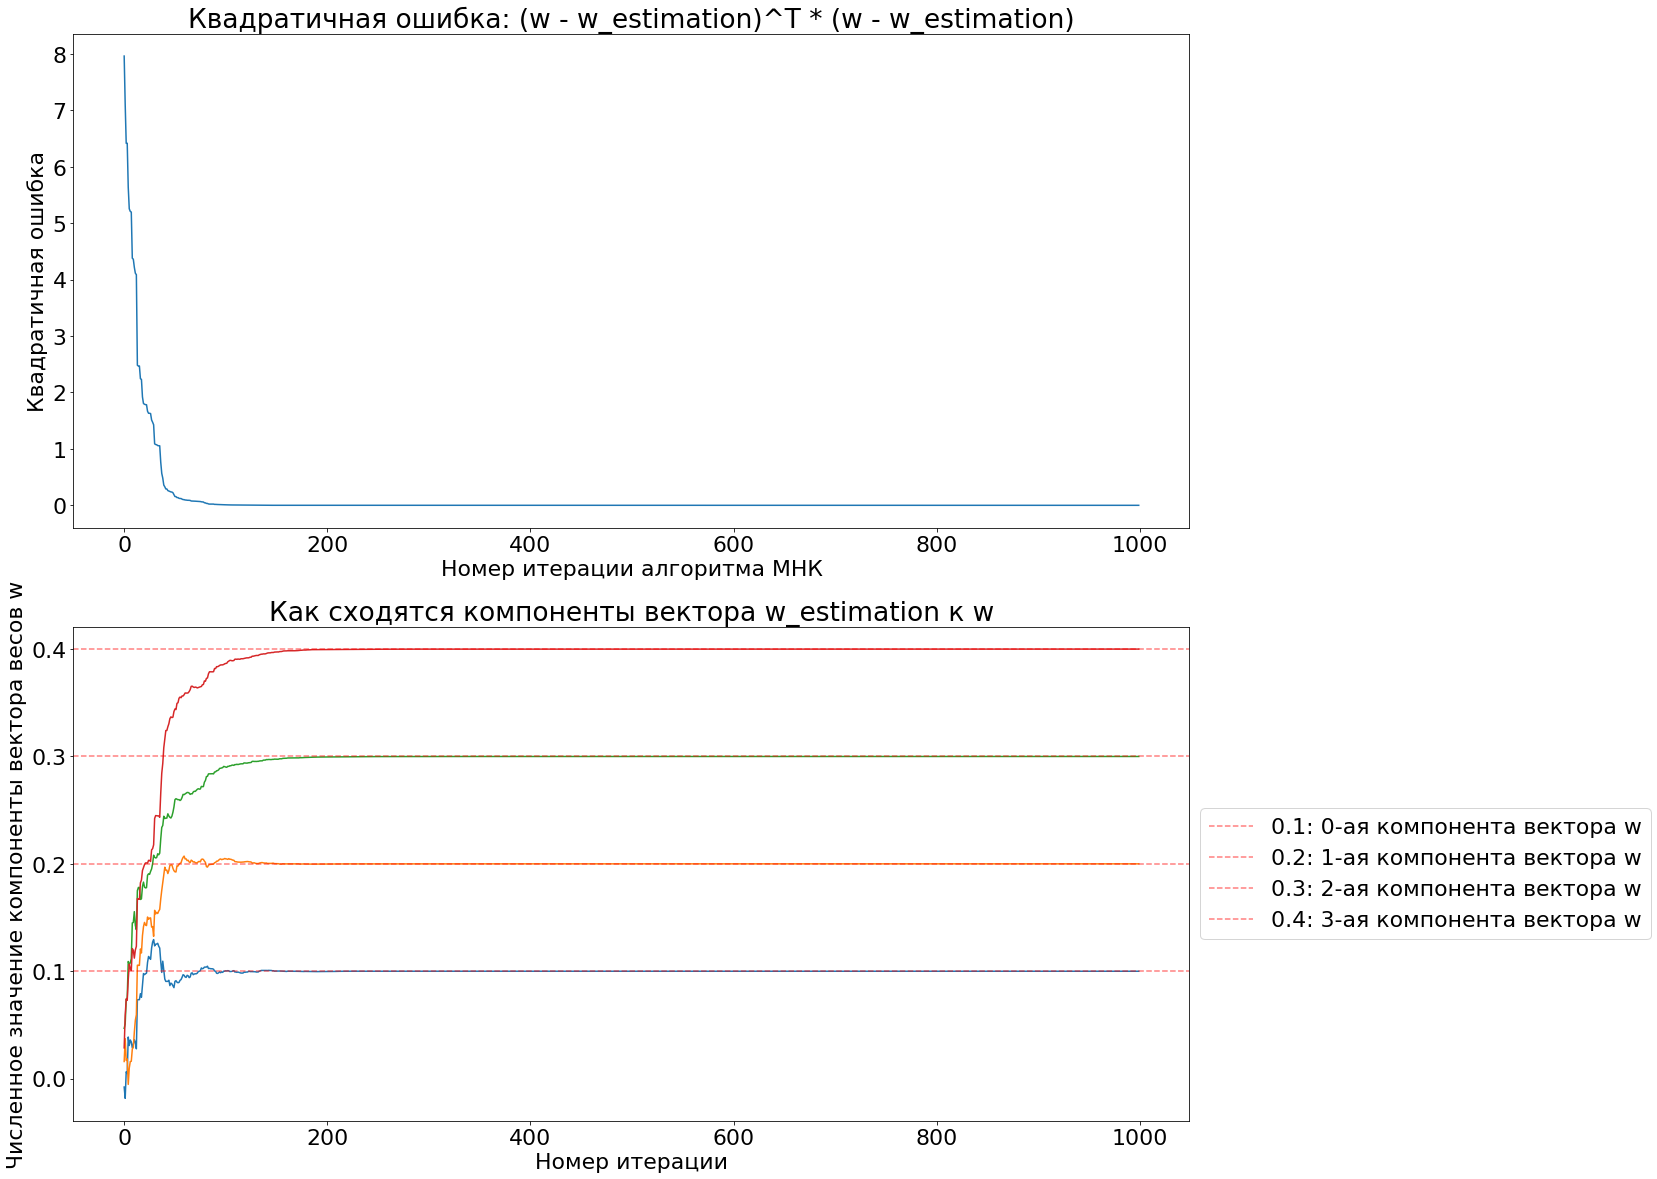

In [141]:
plot_error_and_convergence(stoch_errors_by_iter, weights_history.T)
plot_true_weights(weights_history.T, w)

# C шумом
теперь ищем веса w для модели y = x * w + epsilon,
где epsilon - случайная ошибка(она накладывается в момент генерации обучающей выборки
и регулируется параметром sigma)

In [143]:
sigma = 0.2

In [144]:
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  
y = y.flatten()
stoch_grad_desc_weights, stoch_errors_by_iter, weights_history = stochastic_gradient_descent(x, y, w_init = np.zeros(x.shape[1]), eta=0.1, max_iter=1000, min_weight_dist=1e-8, seed=42)

100%|██████████| 1000/1000 [00:00<00:00, 32257.92it/s]

y_with_no_error = -1.596884533904836; error = [0.07992948]
y_with_no_error = -2.1752028962132837; error = [0.08673836]
y_with_no_error = -2.988980758367488; error = [0.0701635]
y_with_no_error = 0.4716680145721672; error = [-0.0896729]
y_with_no_error = 5.980746124724941; error = [0.01519968]
y_with_no_error = 1.6323844635026152; error = [0.04457922]
y_with_no_error = 1.5387282949336794; error = [0.06771651]
y_with_no_error = 0.1439016780429032; error = [0.04724944]
y_with_no_error = -0.8064011256855523; error = [0.00122079]
y_with_no_error = -0.3362601094215131; error = [-0.00914641]
y_with_no_error = -0.02015068754770316; error = [-0.08242638]
y_with_no_error = -5.226000862193414; error = [0.02122038]
y_with_no_error = 3.0875368648751422; error = [-0.01829634]
y_with_no_error = 0.09343358005929847; error = [0.08528988]
y_with_no_error = 2.9481856652873293; error = [0.05010038]
y_with_no_error = -2.0964311421409176; error = [0.02675171]
y_with_no_error = 2.0742151522184096; error = [-

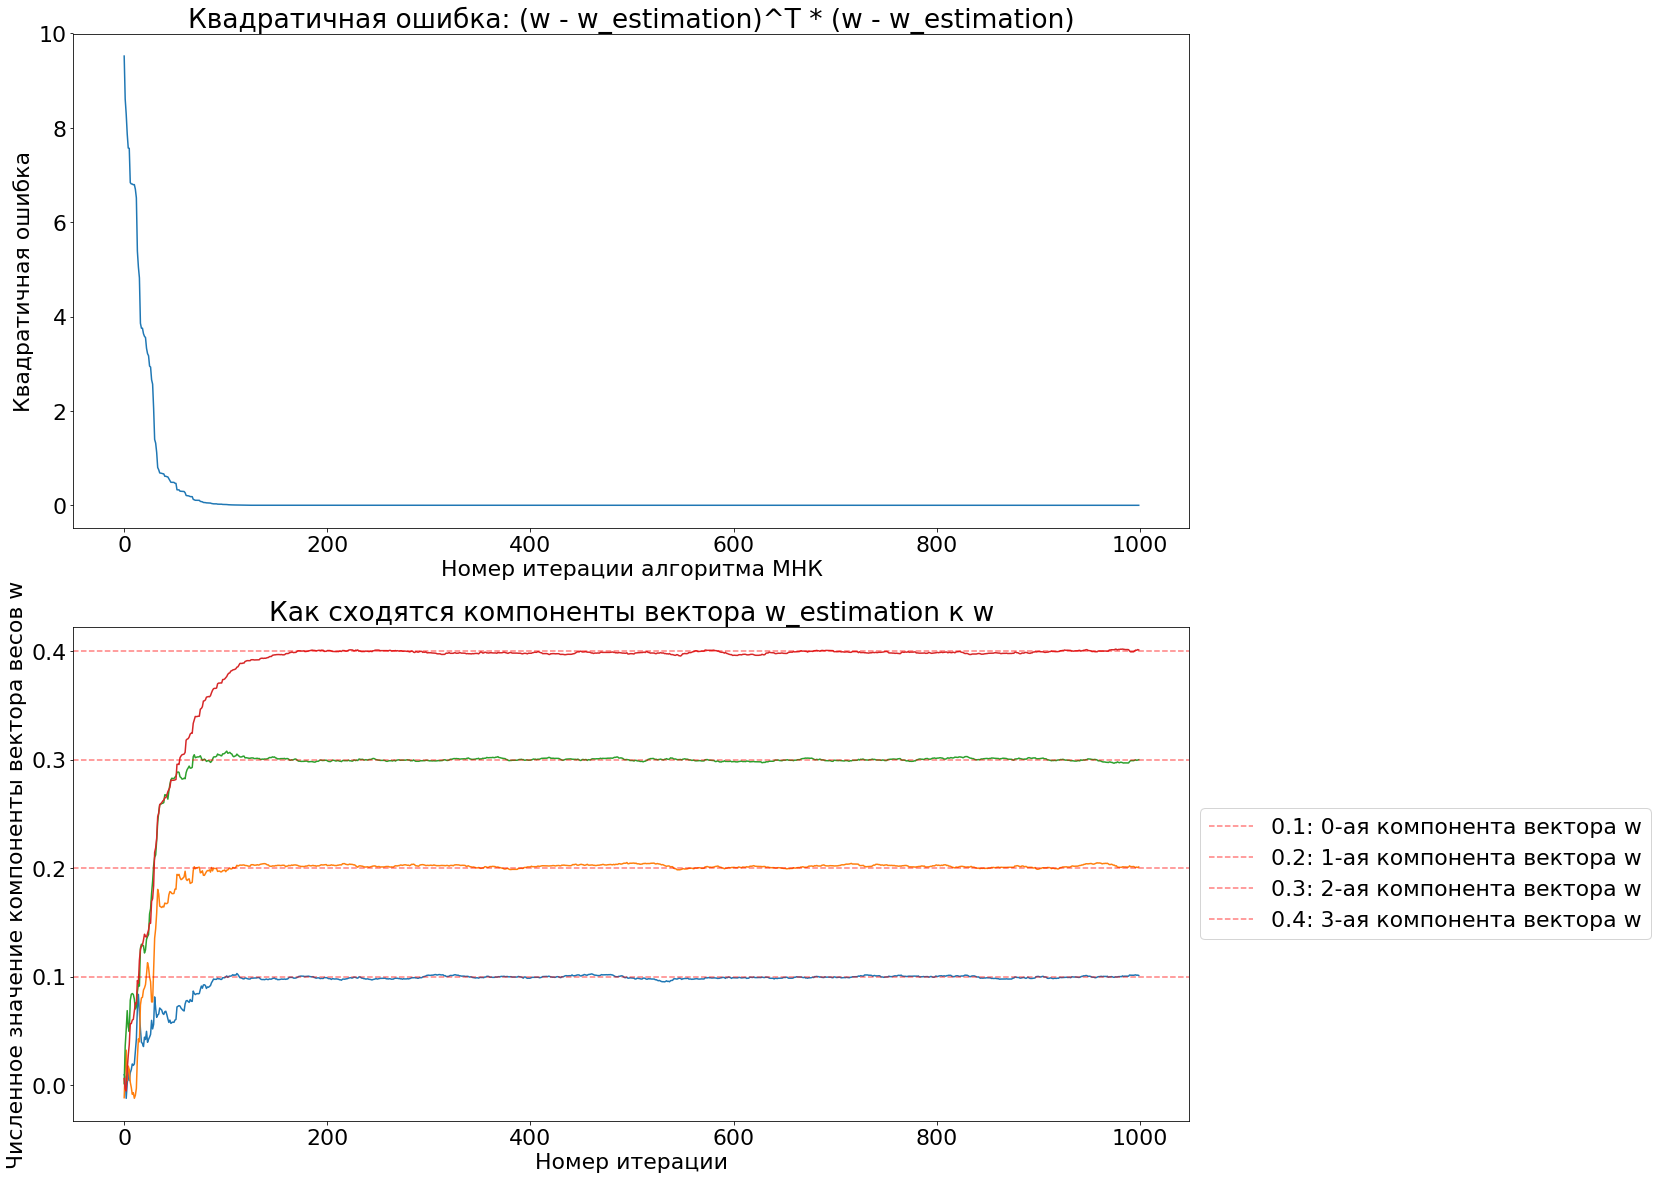

In [145]:
plot_error_and_convergence(stoch_errors_by_iter, weights_history.T)
plot_true_weights(weights_history.T, w)

# Теперь веса w будут линейно изменяться во времени

In [165]:
sample_size = 200  # размер выборки
num_of_features = 4 # кол-во признаков - кол-во столбцов в матр. x и размер вектора w

sigma = 0.2

In [167]:
w = np.array([0.1, 0.2, 0.3, 0.4])

In [168]:
x, y = generate_train_set(w, sigma, sample_size, num_of_features)  
y = y.flatten()

y_with_no_error = 1.7797723983936318; error = [-0.01083345]
y_with_no_error = -4.817868390290869; error = [0.03017769]
y_with_no_error = -1.361635372055885; error = [0.09844231]
y_with_no_error = -6.091527107141813; error = [0.00495493]
y_with_no_error = -1.3089115672238392; error = [-0.08187871]
y_with_no_error = 2.400108444559394; error = [0.07198808]
y_with_no_error = 0.7798158974917524; error = [0.01265764]
y_with_no_error = -5.851735304098324; error = [0.0366527]
y_with_no_error = -1.2785542558575416; error = [-0.06355278]
y_with_no_error = -0.9994010816306513; error = [-0.09373734]
y_with_no_error = 3.267758425030299; error = [0.0454544]
y_with_no_error = 3.7492391901830033; error = [0.06890677]
y_with_no_error = 4.895958201927274; error = [0.02140685]
y_with_no_error = -7.146214724831018; error = [-0.0153197]
y_with_no_error = -6.361066095775761; error = [0.04226839]
y_with_no_error = 4.770612455282107; error = [0.08299194]
y_with_no_error = -2.963113431338989; error = [0.033768

# Пусть 4 вес изменяется от -0.4 до 0.4

In [169]:
coeffs = np.linspace(-0.4, 0.4, sample_size)

In [171]:
y_ = []
for x_, w_ in zip(x, coeffs):
    w[3] = w_
    y_.append(sum(x_ * w))
    

In [156]:
x = np.linspace(-10, 10, sample_size).reshape((-1,1))
y = np.array([])

for w_example, _x in zip(w, x):
    w_example = np.asarray(w_example).reshape((-1,))
    y = np.append(y, w_example * _x)

In [157]:
x.shape

(200, 1)

In [172]:
stoch_grad_desc_weights, stoch_errors_by_iter, weights_history = stochastic_gradient_descent(x, y_, w_init = np.zeros(x.shape[1]), eta=0.1, max_iter=1000, min_weight_dist=1e-8, seed=42)

100%|██████████| 1000/1000 [00:00<00:00, 22563.24it/s]


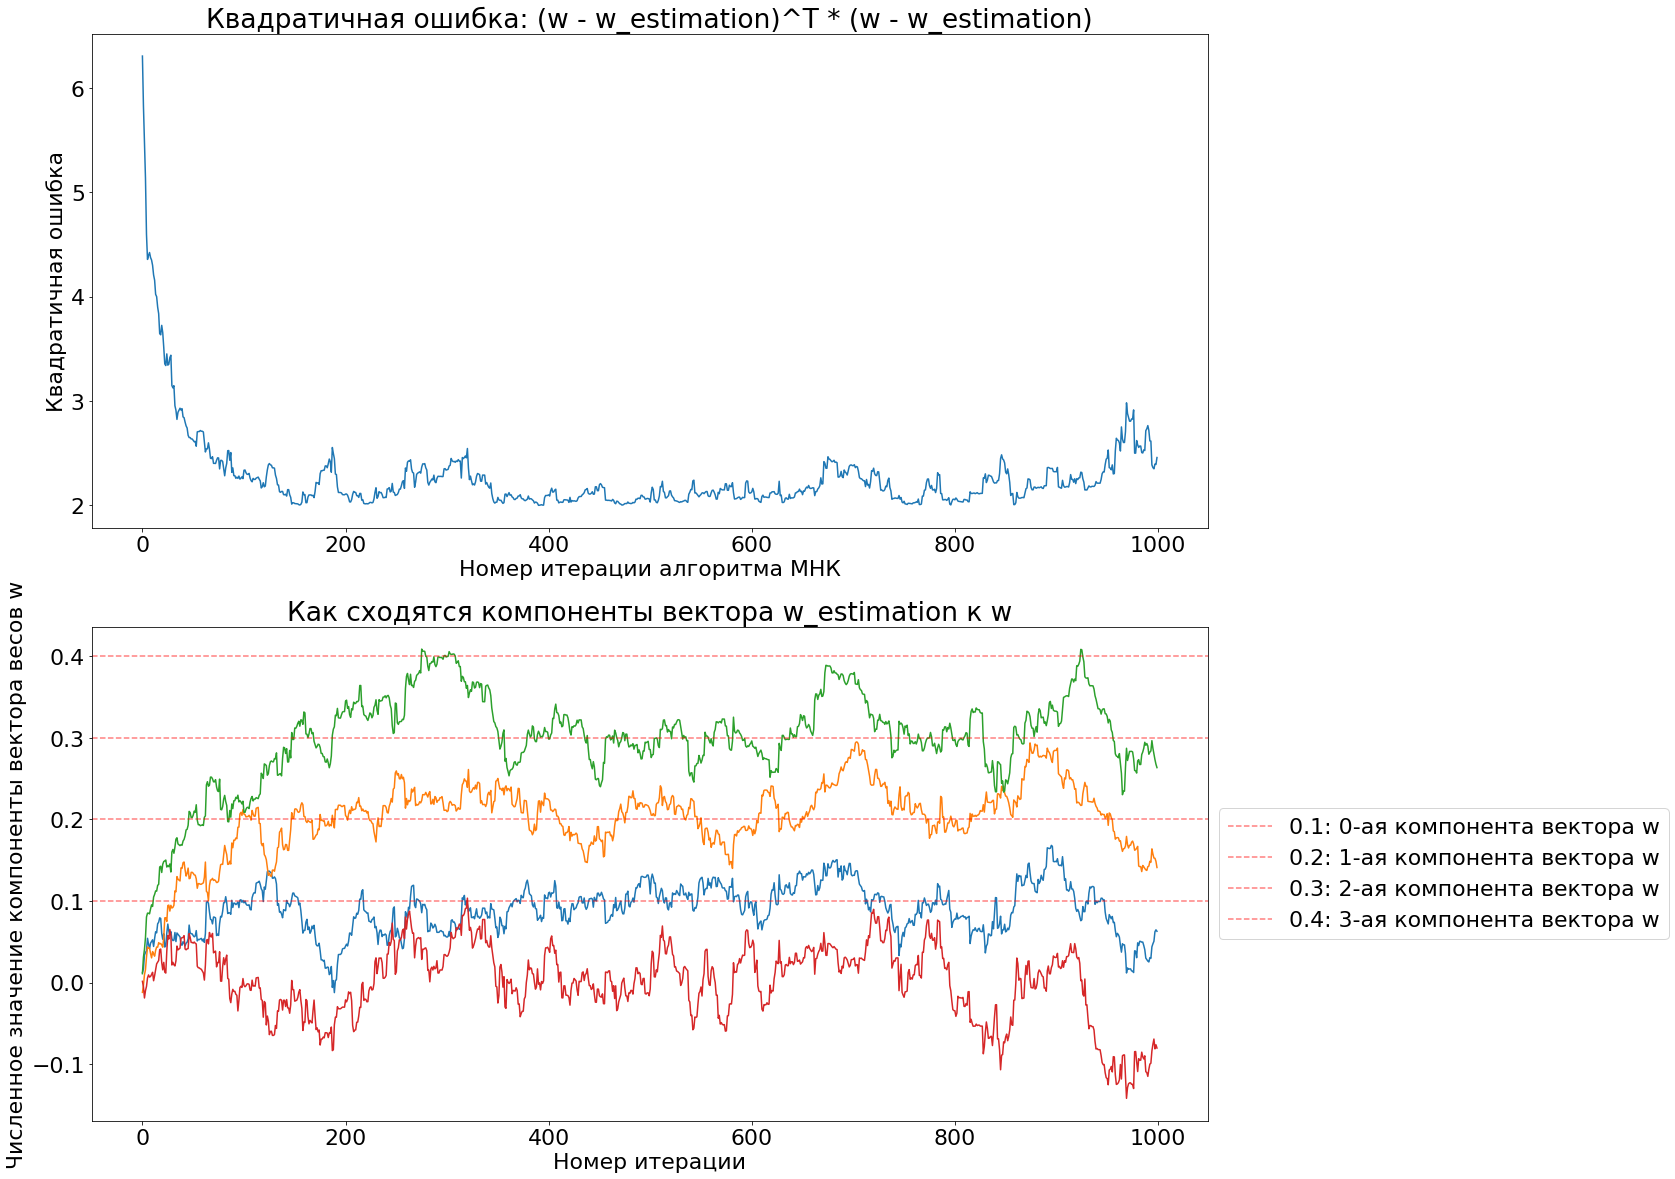

In [173]:
plot_error_and_convergence(stoch_errors_by_iter, weights_history.T)
plot_true_weights(weights_history.T, w)